# SVM

Autor: Jarosław Ciołek-Żelechowski, 218386

# Imports

In [1]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np

from PIL import Image

from skimage.feature import hog
from skimage.color import rgb2grey

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, auc

# Data

In [2]:
dataName = 'data.csv' if os.name != 'nt' else 'dataWin.csv'

labels = pd.read_csv(dataName)
labels.head()

,path,value
0,D:\Studia\MGU\Data\PS-Battles-master\originals...,0
1,D:\Studia\MGU\Data\PS-Battles-master\photoshop...,1
2,D:\Studia\MGU\Data\PS-Battles-master\photoshop...,1
3,D:\Studia\MGU\Data\PS-Battles-master\photoshop...,1
4,D:\Studia\MGU\Data\PS-Battles-master\photoshop...,1


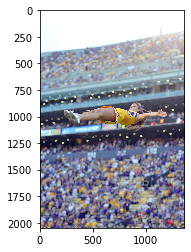

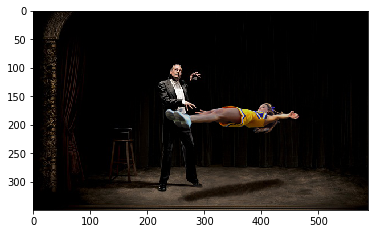

In [3]:
def get_image(path):
    img = Image.open(path)
    return np.array(img)


org_row = labels[labels.value == 0].path[0]
plt.imshow(get_image(org_row))
plt.show()

ps_row = labels[labels.value == 1].path[1]
plt.imshow(get_image(ps_row))
plt.show()

# Grayscale + scale image to 224 x 224

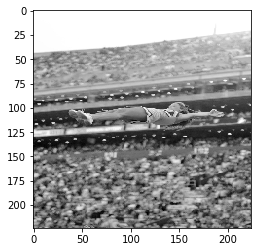

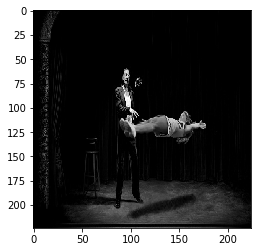

(224, 224)


In [4]:
def get_image(path):
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img)
    img = rgb2grey(img)
    return img

org_row = labels[labels.value == 0].path[0]
plt.imshow(get_image(org_row), cmap='gray')
plt.show()

ps_row = labels[labels.value == 1].path[1]
plt.imshow(get_image(ps_row), cmap='gray')
plt.show()

print(get_image(org_row).shape)

# HOG - Histogram of oriented gradients

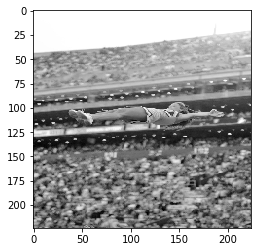

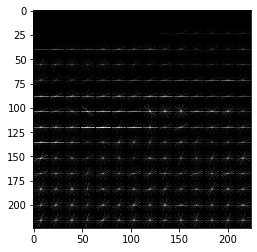

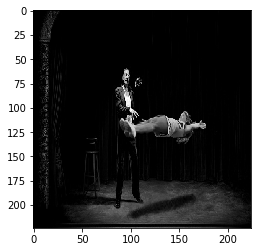

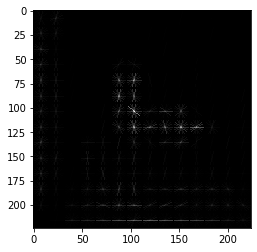

[0.20352866 0.06570472 0.09385824 ... 0.05298583 0.08351182 0.02611995]


In [5]:
org_row = labels[labels.value == 0].path[0]
img = get_image(org_row)
plt.imshow(img, cmap='gray')
plt.show()


hog_features, hog_image = hog(img, visualize=True, block_norm='L2-Hys', pixels_per_cell=(16,16))
plt.imshow(hog_image, cmap='gray')
plt.show()

ps_row = labels[labels.value == 1].path[1]
img = get_image(ps_row)
plt.imshow(img, cmap='gray')
plt.show()


hog_features, hog_image = hog(img, visualize=True, block_norm='L2-Hys', pixels_per_cell=(16,16))
plt.imshow(hog_image, cmap='gray')
plt.show()

print(hog_features)

# Create image features and flatten to a row

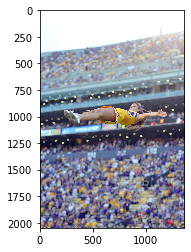

[255 255 255 ... 131  94 102]


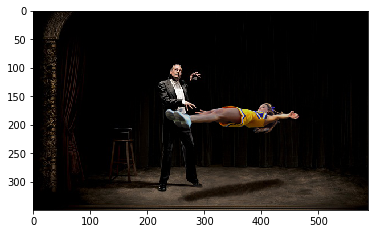

[0 0 0 ... 0 0 2]


In [6]:
def get_image(path):
    img = Image.open(path)
#     img = img.resize((224,224))
    img = np.array(img)
    return img

def create_features(path):
    img = get_image(path)
    c_f = img.flatten()
    g_i = rgb2grey(img)
    h_f = hog(img, block_norm='L2-Hys', pixels_per_cell=(16, 16))
    # zespolenie hog + kolor
    flat_features = np.hstack(c_f)
    return flat_features
    
org_row = labels[labels.value == 0].path[0]
img = get_image(org_row)
plt.imshow(img, cmap='gray')
plt.show()

org_features = create_features(org_row)
print(org_features)

ps_row = labels[labels.value == 1].path[1]
img = get_image(ps_row)
plt.imshow(img, cmap='gray')
plt.show()

ps_features = create_features(ps_row)
print(ps_features)

In [7]:
import difflib

print(len(org_features))
print(len(ps_features))

diff = difflib.SequenceMatcher(None,org_features, ps_features)
odp = diff.ratio()
print(odp)


8374272
617400
0.0008681366491126456


# Preprocess all images

In [8]:
def get_image(path):
    img = Image.open(path)
#     img = img.resize((224,224))
    img = img.convert('RGB')
    img = np.array(img)
    return img

def create_features(path):
    img = get_image(path)
    c_f = img.flatten()
    g_i = rgb2grey(img)
    h_f = hog(img, block_norm='L2-Hys', pixels_per_cell=(16, 16))
    # zespolenie hog + kolor
    flat_features = np.hstack(c_f)
    return flat_features

def create_feature_matrix(label_dataframe):
    print(f'{len(label_dataframe)}')
    features_list = []
    how_many = 0
    
    for img_id in label_dataframe.path:
        out = how_many / len(label_dataframe.path) * 100
        how_many += 1
        image_features = create_features(img_id)
        features_list.append(image_features)
        
    feature_matrix = np.array(features_list)
    return feature_matrix

dataName = 'data.csv' if os.name != 'nt' else 'dataWin.csv'

labels = pd.read_csv(dataName)
labels.head()
# feature_matrix = create_feature_matrix(labels)
# print('Done')

,path,value
0,D:\Studia\MGU\Data\PS-Battles-master\originals...,0
1,D:\Studia\MGU\Data\PS-Battles-master\photoshop...,1
2,D:\Studia\MGU\Data\PS-Battles-master\photoshop...,1
3,D:\Studia\MGU\Data\PS-Battles-master\photoshop...,1
4,D:\Studia\MGU\Data\PS-Battles-master\photoshop...,1


# PCA (NA RAZIE NIE)

In [9]:
# print('Feature matrix shape is: ', feature_matrix.shape)

# ss = StandardScaler()
# stand = ss.fit_transform(feature_matrix)

# pca = PCA(n_components=500)
# pca = ss.fit_transform(stand)

# print('PCA matrix shape is: ', pca.shape)

# Split

In [10]:
X = pd.DataFrame(labels.path)
y = pd.Series(labels.value.values)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.3,
                                                    random_state=1234123)

pd.Series(y_train).value_counts()

1    61592
0     7759
dtype: int64

# Train

In [11]:
from sklearn.model_selection import cross_val_score

svm = SVC(kernel='linear', probability=True, random_state=42)
# score = cross_val_score(svm, X_train, y_train, scoring='recall_macro', cv=5)  
# print(score)

# fit model
svm.fit(create_feature_matrix(X_train), y_train)

69351


KeyboardInterrupt: 

# Score

In [ ]:
# generate predictions
y_pred = svm.predict(create_feature_matrix(X_test))

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy is: ', accuracy)

In [ ]:
accuracy = svm.score(create_feature_matrix(X_test), y_test)
print('Model accuracy is: ', accuracy)

# ROC(Receiver Operating Characteristics) + AUC(Area Under The Curve)

In [ ]:
# predict probabilities for X_test using predict_proba
probabilities = svm.predict_proba(create_feature_matrix(X_test))

# select the probabilities for label 1.0
y_proba = probabilities[:, 1]

# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba, pos_label=1)

# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Save

In [ ]:
from joblib import dump, load

dump(svm, 'svm.joblib')

# Check

In [ ]:
if os.name == 'nt':
    path = 'D:\Studia\MGU\Data\PS-Battles-master'
    slash = '\\'
else:
    path = '../../MGU/Projekt/PS-Battles-master'
    slash = '/'

org = path + slash + 'originals' + slash + 'rxp4f.jpg'
ps = path + slash + 'photoshops' + slash + 'rxp4f' + slash + 'c49gxg3_0.jpg'

In [ ]:
plt.imshow(get_image(org), cmap='gray')
plt.show()

plt.imshow(get_image(ps), cmap='gray')
plt.show()

In [ ]:
print(svm.predict([create_features(org)]))

In [ ]:
print(svm.predict([create_features(ps)]))

# Wait what?

In [ ]:
labels.head()

In [ ]:
how_many = 1000

data = labels[labels.value == 0].path[:how_many]

rt = 0
for i in data:
    out = svm.predict([create_features(i)])
    if out[0] != 1:
        print(f'{out[0]}: {i}')
        rt += 1

print(f'{rt}')
print(f'{rt / how_many * 100:.2f} %')